# Descarga de Dados GFS



## Instalación de librerias necesarias

- Librería siphon


```bash
conda install -c conda-forge geemap eemont siphon xarray[complete] netCDF4
```

- Librería geemap

```bash
conda install -c conda-forge geemap
```



Antes de iniciar debes obtener tu credencial para descargas:
```bashrc
earthengine authenticate
```


In [6]:
from siphon.catalog import TDSCatalog
import xarray as xr
import datetime

In [7]:
# Latest GFS TDSCatalog
url = 'https://thredds-jumbo.unidata.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p25deg/latest.xml'
catalog = TDSCatalog(url)
catalog.datasets

['GFS_Global_0p25deg_20221017_1200.grib2']

In [8]:
# Time of interest
obs = datetime.date.today() + datetime.timedelta(days = 1)
obs_time = datetime.datetime(obs.year, obs.month, obs.day,
                             hour = 6, minute = 0)
obs_time

datetime.datetime(2022, 10, 18, 6, 0)

In [9]:
def get_netcdf_subset(catalog, variable, obs_time):
    # Boundaries
    south = -15.0
    north = 15.0
    west = 90
    east = 150
    
    # NetCDF Subset Service Query
    ncss = catalog.datasets[0].subset()
    query = ncss.query()
    
    query.lonlat_box(west = west, east = east, south = south, north = north)
    query.variables(variable)
    query.time(obs_time)

    return xr.open_dataset(xr.backends.NetCDF4DataStore(ncss.get_data(query)))


In [15]:
rain = 'Total_precipitation_surface_Mixed_intervals_Accumulation'

# ds_rain = get_netcdf_subset(catalog, rain, obs_time)
# print(dir(ds_rain))

ds_rain = get_netcdf_subset(catalog, rain, obs_time).sel(time3 = obs_time)


In [ ]:
temp = 'Temperature_surface'
ds_temp = get_netcdf_subset(catalog, temp, obs_time).sel(time3 = obs_time)

In [ ]:
wind = 'Wind_speed_gust_surface'
ds_wind = get_netcdf_subset(catalog, wind, obs_time).sel(time3 = obs_time)

In [ ]:
rhum = 'Relative_humidity_height_above_ground'
ds_rhum = get_netcdf_subset(catalog, rhum, obs_time) \
    .sel(height_above_ground = 2.0) \
    .sel(time3 = obs_time)

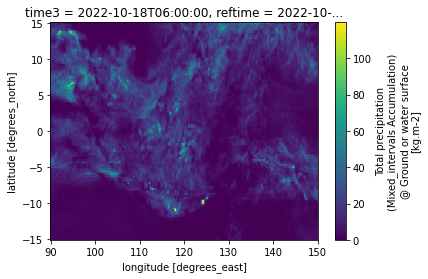

In [31]:
# print(ds_rain.keys)
ds_rain.Total_precipitation_surface_Mixed_intervals_Accumulation.plot(x='longitude', y='latitude')
